In [93]:
import pandas as pd

fantasy_data = pd.read_csv("/content/sample_data/Final_Fantasy_data.csv")
match_details = pd.read_csv("/content/sample_data/Match_details.csv")
batting_data = pd.read_csv("/content/sample_data/Batting_data.csv")
bowling_data = pd.read_csv("/content/sample_data/Bowling_data.csv")
fielding_data = pd.read_csv("/content/sample_data/Fielding_data.csv")

In [2]:
batting_data


,match_id,season,match_name,home_team,away_team,venue,bowling_team,batting_team,batting_innings,fullName,batting_position,runs,balls,fours,sixes,strike_rate,Batting_FP
0,1359475,2023,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,CSK,1,Devon Conway,1,1,6,0,0,16.66,1
1,1359475,2023,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,CSK,1,Ruturaj Gaikwad,2,92,50,4,9,184.00,128
2,1359475,2023,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,CSK,1,Moeen Ali,3,23,17,4,1,135.29,31
3,1359475,2023,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,CSK,1,Ben Stokes,4,7,6,1,0,116.66,8
4,1359475,2023,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,CSK,1,Ambati Rayudu,5,12,12,0,1,100.00,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15709,336040,2008,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",CSK,RR,2,Yusuf Pathan,5,56,39,3,4,143.58,77
15710,336040,2008,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",CSK,RR,2,Mohammad Kaif,6,12,9,0,1,133.33,14
15711,336040,2008,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",CSK,RR,2,Ravindra Jadeja,7,0,1,0,0,0.00,-2
15712,336040,2008,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",CSK,RR,2,Shane Warne,8,9,9,1,0,100.00,10


In [3]:
import pandas as pd

# Step 1: Load the data
df = pd.read_csv('/content/sample_data/Batting_data.csv')

# Step 2: Group by player and calculate totals
batting_stats = df.groupby('fullName').agg(
    Matches=('runs', 'count'),
    Total_Runs=('runs', 'sum'),
    Total_Balls=('balls', 'sum'),
    Average_Runs=('runs', 'mean'),
    Total_FantasyPoints=('Batting_FP', 'sum'),
    Total_Fours=('fours', 'sum'),
    Total_Sixes=('sixes', 'sum')
).reset_index()

# Step 3: Calculate Strike Rate manually
batting_stats['Strike_Rate'] = (batting_stats['Total_Runs'] / batting_stats['Total_Balls']) * 100




In [4]:
batting_stats


,fullName,Matches,Total_Runs,Total_Balls,Average_Runs,Total_FantasyPoints,Total_Fours,Total_Sixes,Strike_Rate
0,AB de Villiers,170,5162,3403,30.364706,6815,413,251,151.689686
1,Aakash Chopra,6,53,71,8.833333,56,7,0,74.647887
2,Aaron Finch,90,2091,1631,23.233333,2691,214,78,128.203556
3,Abdul Basith,1,1,1,1.000000,1,0,0,100.000000
4,Abdul Samad,28,395,287,14.107143,497,22,25,137.630662
...,...,...,...,...,...,...,...,...,...
638,Yusuf Abdulla,1,0,1,0.000000,0,0,0,0.000000
639,Yusuf Pathan,154,3204,2241,20.805195,4180,262,158,142.971888
640,Yuvraj Singh,126,2750,2120,21.825397,3595,217,149,129.716981
641,Yuzvendra Chahal,20,37,86,1.850000,25,0,0,43.023256


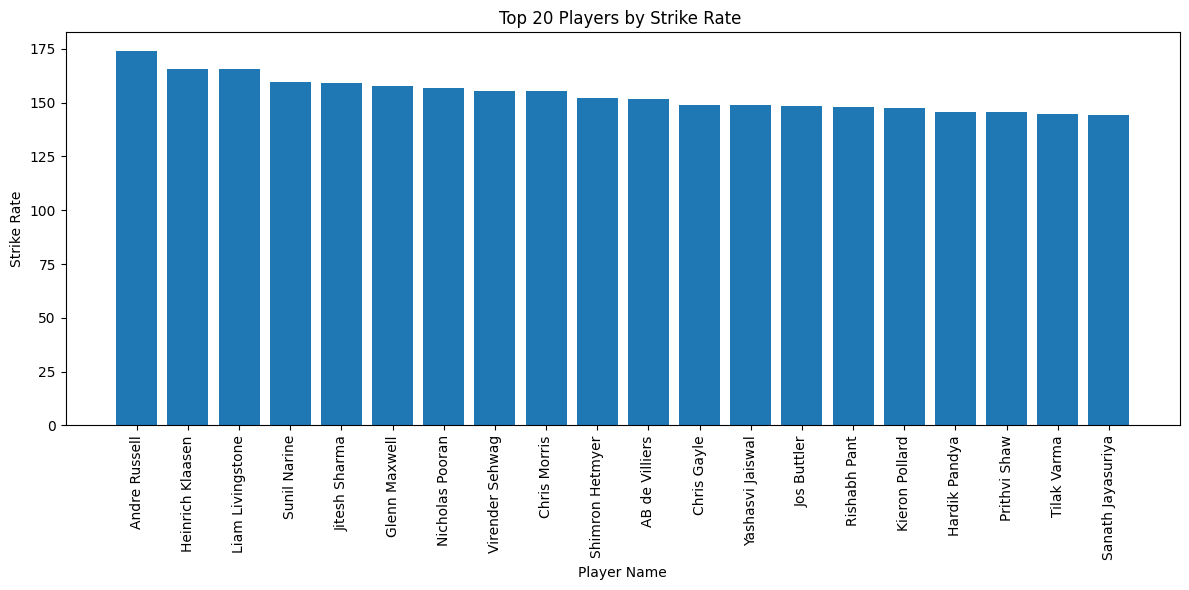

In [5]:
import matplotlib.pyplot as plt
# Filter the dataframe for players with matches > 20 and runs > 1000
filtered_players = batting_stats[(batting_stats['Matches'] > 10) & (batting_stats['Total_Runs'] > 500)]

# Sort by Strike_Rate and take the top 20
top_strike_rate_players = filtered_players.sort_values(by='Strike_Rate', ascending=False).head(20)

# Create the countplot
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
plt.bar(top_strike_rate_players['fullName'], top_strike_rate_players['Strike_Rate'])

# Add labels and title
plt.xlabel('Player Name')
plt.ylabel('Strike Rate')
plt.title('Top 20 Players by Strike Rate ')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

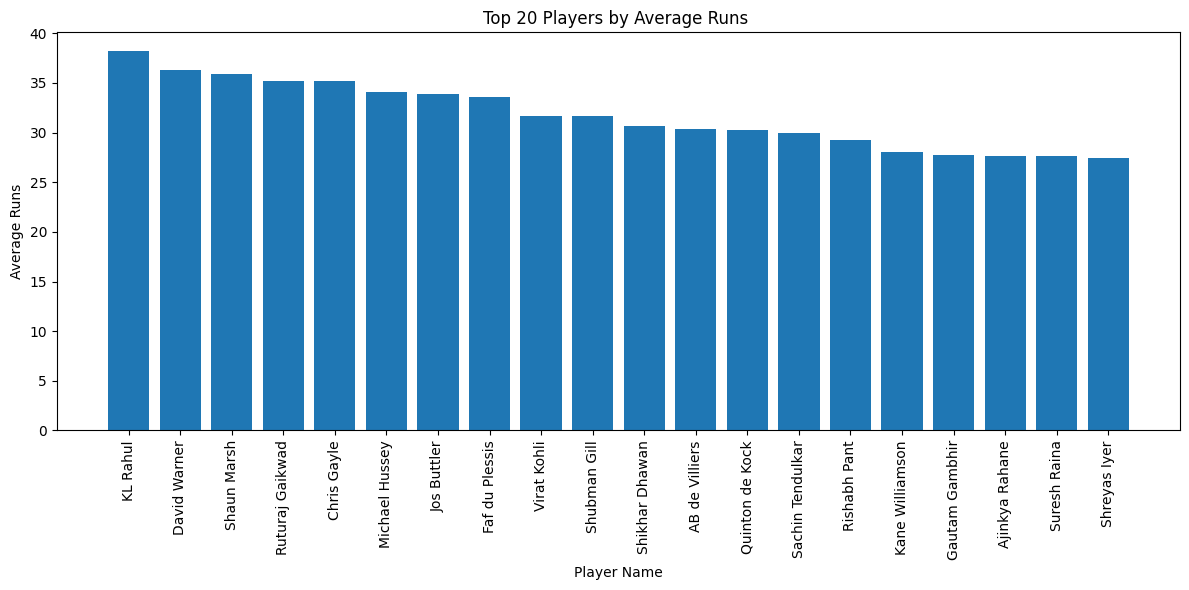

In [6]:
import matplotlib.pyplot as plt
# Filter for players with more than 100 matches
filtered_batting_stats = batting_stats[batting_stats['Matches'] > 50]
# Sort by Average_Runs in descending order and take the top 20
top_20_players = filtered_batting_stats.sort_values(by='Average_Runs', ascending=False).head(20)
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_20_players['fullName'], top_20_players['Average_Runs'])
plt.xticks(rotation=90)
plt.xlabel('Player Name')
plt.ylabel('Average Runs')
plt.title('Top 20 Players by Average Runs ')
plt.tight_layout()
plt.show()

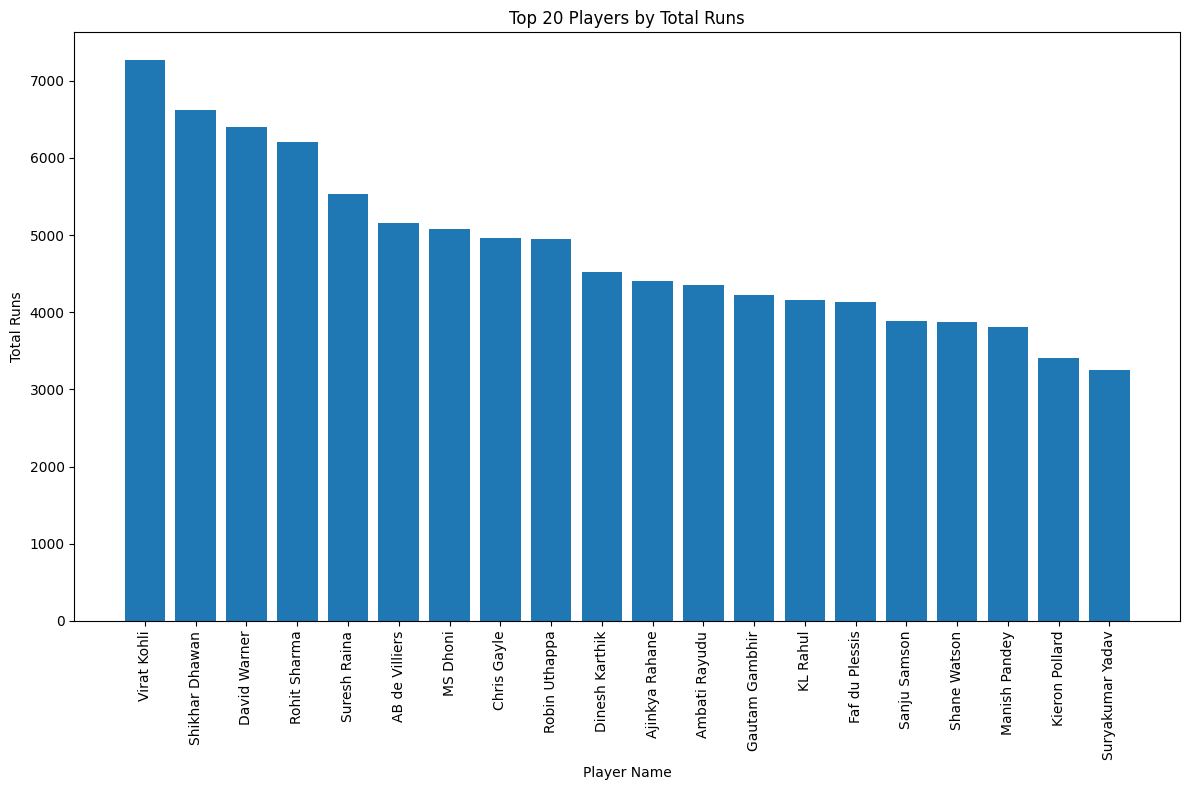

In [7]:
# prompt: Using dataframe batting_stats: plot countplot of 20 top players with runs using matplotlib

import matplotlib.pyplot as plt

# Sort the dataframe by Total_Runs in descending order and get the top 20 players
top_20_players = batting_stats.sort_values(by='Total_Runs', ascending=False).head(20)

# Create a bar plot of Total_Runs for the top 20 players
plt.figure(figsize=(12, 8))
plt.bar(top_20_players['fullName'], top_20_players['Total_Runs'])
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Top 20 Players by Total Runs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
top_players = df.groupby(['season', 'fullName']).agg(
    Runs=('runs', 'sum'),
    Balls=('balls', 'sum')

).reset_index()

top_players['Strike_Rate'] = (top_players['Runs'] / top_players['Balls']) * 100


In [9]:
top_players

,season,fullName,Runs,Balls,Strike_Rate
0,2008,AB de Villiers,95,98,96.938776
1,2008,Aakash Chopra,42,52,80.769231
2,2008,Abdur Razzak,0,2,0.000000
3,2008,Abhinav Mukund,0,1,0.000000
4,2008,Abhishek Nayar,206,138,149.275362
...,...,...,...,...,...
2469,2023,Wayne Parnell,2,5,40.000000
2470,2023,Wriddhiman Saha,371,287,129.268293
2471,2023,Yash Dhull,16,23,69.565217
2472,2023,Yashasvi Jaiswal,625,382,163.612565


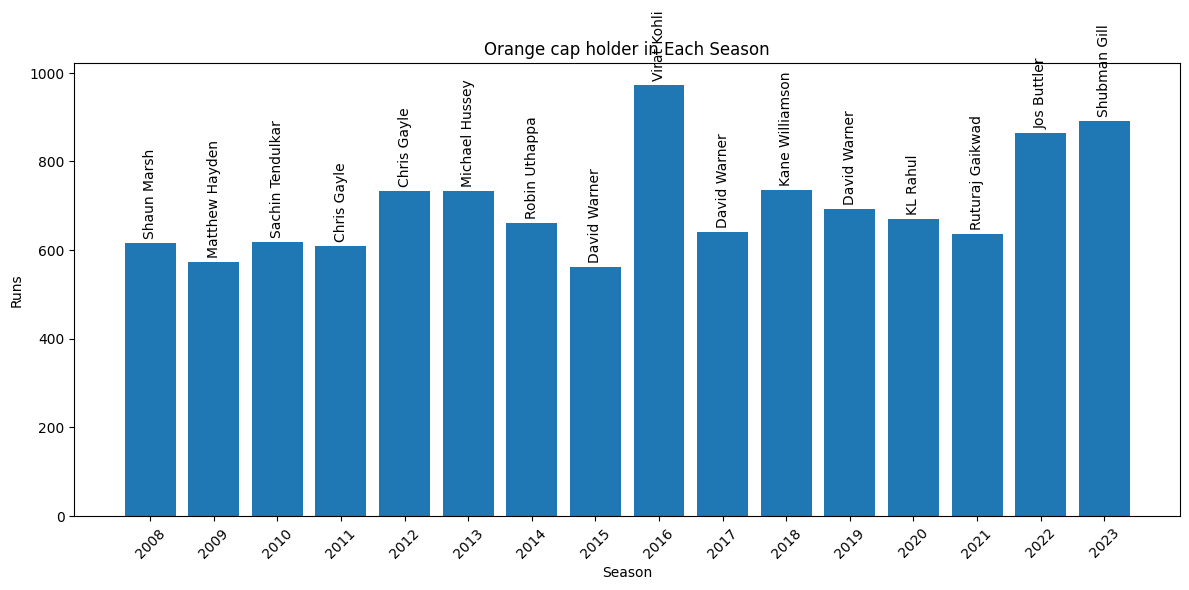

In [10]:
# prompt: Using dataframe top_players: plot bargraph top top performers from each season matplotlib with name show

import matplotlib.pyplot as plt

# Find the top player in each season based on 'Runs'
top_players_per_season = top_players.loc[top_players.groupby('season')['Runs'].idxmax()]

# Sort by season for better visualization
top_players_per_season = top_players_per_season.sort_values('season')

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_players_per_season['season'], top_players_per_season['Runs'])

# Add player names as labels above the bars
for bar, name in zip(bars, top_players_per_season['fullName']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, name, ha='center', va='bottom', rotation=90)

plt.xlabel('Season')
plt.ylabel('Runs')
plt.title('Orange cap holder in Each Season')
plt.xticks(top_players_per_season['season'], rotation=45)
plt.tight_layout()
plt.show()

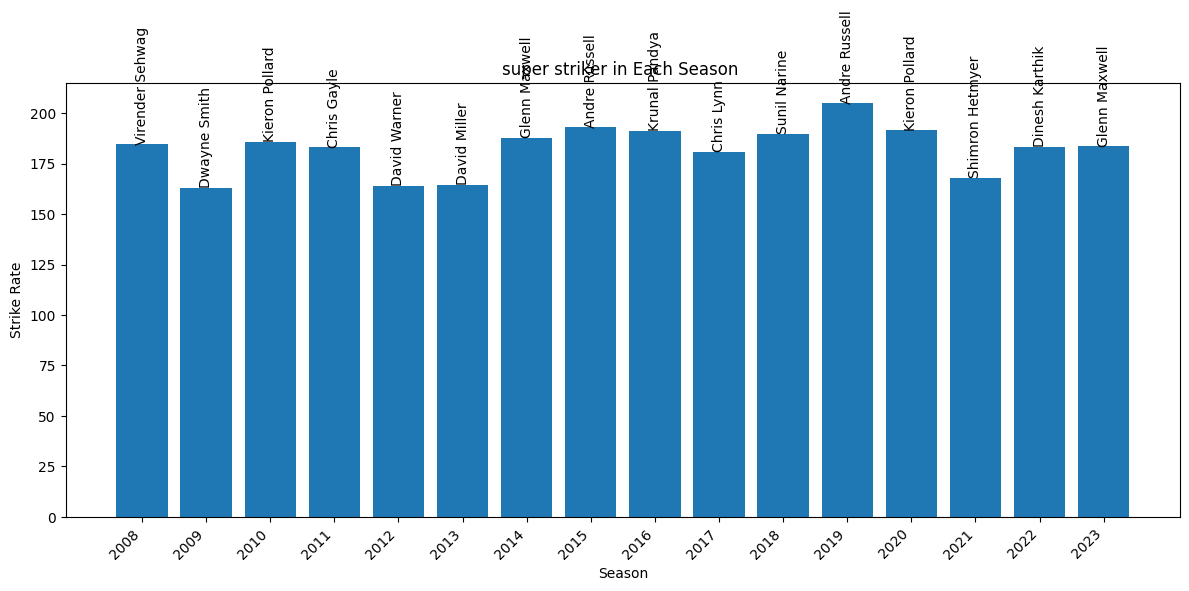

In [11]:
# prompt: Using dataframe top_players: plot season wise one top strike rate of players having  balls >=100  from each match  using mat plot such that show season and players name

import matplotlib.pyplot as plt

# Filter data for players with balls >= 100
filtered_players = top_players[top_players['Balls'] >= 100]

# Group by season and find the player with the highest strike rate in each season
top_strike_rate_per_season = filtered_players.loc[filtered_players.groupby('season')['Strike_Rate'].idxmax()]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_strike_rate_per_season['season'], top_strike_rate_per_season['Strike_Rate'])
plt.xlabel('Season')
plt.ylabel('Strike Rate')
plt.title('super striker in Each Season ')
plt.xticks(top_strike_rate_per_season['season'], rotation=45, ha='right')

# Add player names above the bars
for index, row in top_strike_rate_per_season.iterrows():
    plt.text(row['season'], row['Strike_Rate'], row['fullName'], ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()

In [12]:
explosive = batting_stats[batting_stats['Matches'] >= 10].copy()
explosive['Boundary_Count'] = explosive['Total_Fours'] + explosive['Total_Sixes']
explosive = explosive.sort_values(by='Strike_Rate', ascending=False)


In [13]:
explosive

,fullName,Matches,Total_Runs,Total_Balls,Average_Runs,Total_FantasyPoints,Total_Fours,Total_Sixes,Strike_Rate,Boundary_Count
581,Tim David,24,418,235,17.416667,574,24,31,177.872340,55
48,Andre Russell,96,2262,1300,23.562500,3204,150,193,174.000000,343
164,Dhruv Jurel,11,152,88,13.818182,215,11,9,172.727273,20
284,Kevon Cooper,14,116,68,8.285714,153,9,8,170.588235,17
91,Ben Cutting,17,238,141,14.000000,321,15,19,168.794326,34
...,...,...,...,...,...,...,...,...,...,...
78,Ashok Dinda,17,26,48,1.529412,28,2,0,54.166667,2
508,Shahbaz Nadeem,22,39,87,1.772727,41,2,0,44.827586,2
641,Yuzvendra Chahal,20,37,86,1.850000,25,0,0,43.023256,0
420,Prasidh Krishna,10,9,24,0.900000,7,0,0,37.500000,0


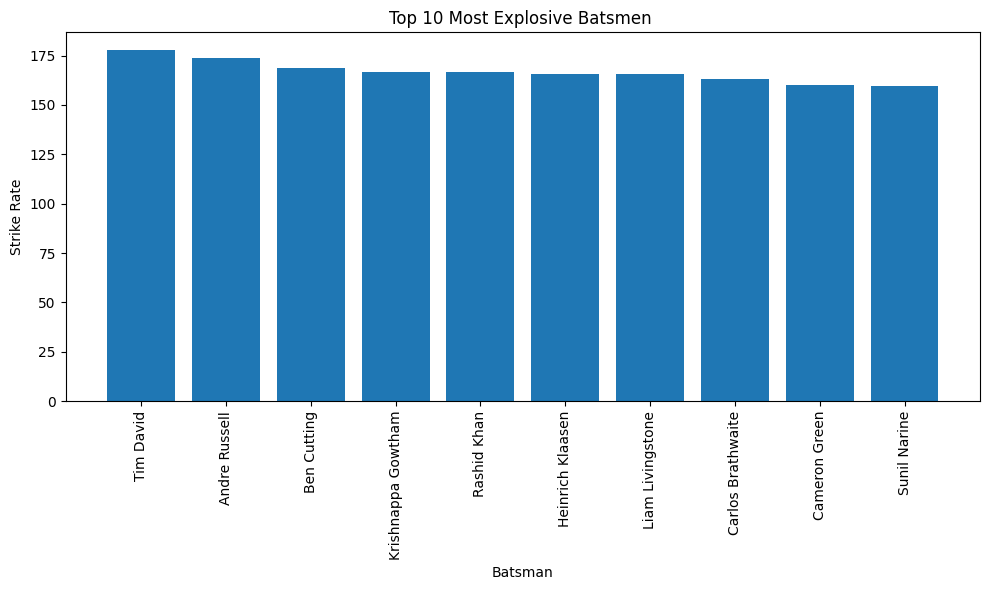

In [14]:
# prompt: Using dataframe explosive: plot bargraph of most explosive batsman with balls>100 matplot

import matplotlib.pyplot as plt

# Filter data for players with more than 100 balls
explosive_filtered = explosive[explosive['Total_Balls'] > 100]

# Sort by strike rate (a measure of explosiveness) and take the top 10
explosive_sorted = explosive_filtered.sort_values(by='Strike_Rate', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(explosive_sorted['fullName'], explosive_sorted['Strike_Rate'])
plt.xticks(rotation=90)
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.title('Top 10 Most Explosive Batsmen ')
plt.tight_layout()
plt.show()

In [15]:
consistent = batting_stats[batting_stats['Matches'] >= 50].copy()
consistent = consistent.sort_values(by='Average_Runs', ascending=False)


In [16]:
consistent

,fullName,Matches,Total_Runs,Total_Balls,Average_Runs,Total_FantasyPoints,Total_Fours,Total_Sixes,Strike_Rate
265,KL Rahul,109,4163,3097,38.192661,5368,355,168,134.420407
151,David Warner,176,6397,4572,36.346591,8417,646,226,139.916885
518,Shaun Marsh,69,2477,1866,35.898551,3215,266,78,132.743837
479,Ruturaj Gaikwad,51,1797,1326,35.235294,2346,159,73,135.520362
125,Chris Gayle,141,4965,3333,35.212766,6761,404,357,148.964896
...,...,...,...,...,...,...,...,...,...
414,Piyush Chawla,86,609,548,7.081395,700,55,19,111.131387
43,Amit Mishra,57,381,419,6.684211,422,31,5,90.930788
422,Praveen Kumar,59,340,314,5.762712,406,22,17,108.280255
101,Bhuvneshwar Kumar,63,283,297,4.492063,304,27,3,95.286195


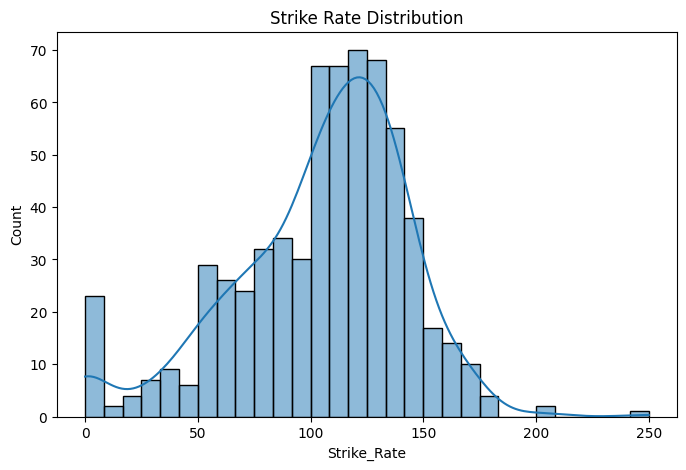

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(data=batting_stats, x='Strike_Rate', bins=30, kde=True)
plt.title('Strike Rate Distribution')
plt.show()

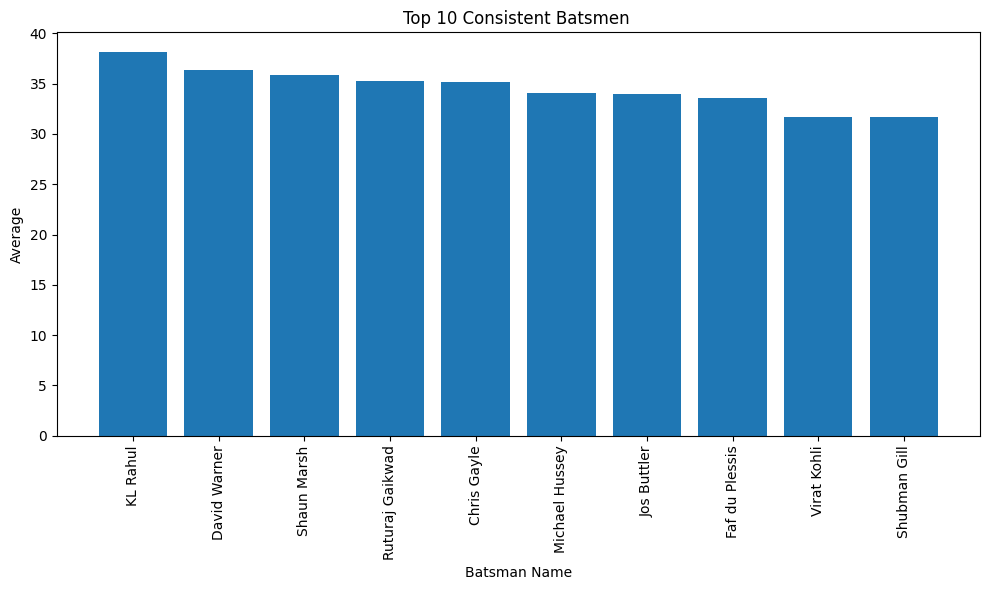

In [18]:
# prompt: Using dataframe consistent: plot top 10 consistent battsman bargraph using matplotlib

import matplotlib.pyplot as plt

# Sort the dataframe by 'Total_Runs' in descending order and select the top 10
top_10_batsmen = consistent.sort_values(by='Average_Runs', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_batsmen['fullName'], top_10_batsmen['Average_Runs'])
plt.xlabel('Batsman Name')
plt.ylabel('Average')
plt.title('Top 10 Consistent Batsmen ')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Enter player's name: Virat Kohli


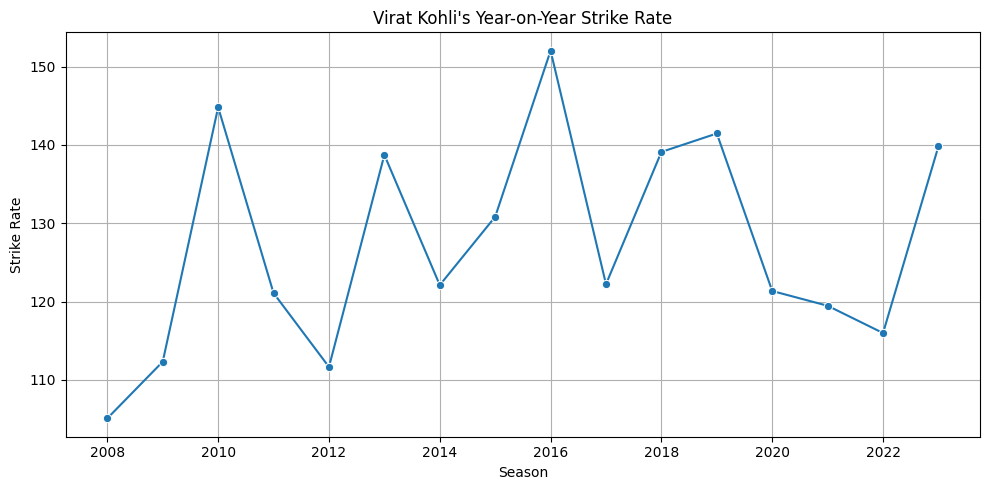

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Aggregate data
yearly = df.groupby(['fullName', 'season']).agg(
    Runs=('runs', 'sum'),
    Balls=('balls', 'sum')  # Assuming the column is named 'ballsFaced'
).reset_index()

# Step 2: Calculate Strike Rate
yearly['Strike_Rate'] = (yearly['Runs'] / yearly['Balls']) * 100

# Step 3: Ask user for player name
name = input("Enter player's name: ")

# Step 4: Filter data for the selected player
player_data = yearly[yearly['fullName'] == name].sort_values(by='season')

# Step 5: Check if the player exists in the data
if player_data.empty:
    print(f"No data found for {name}.")
else:
    plt.figure(figsize=(10,5))
    sns.lineplot(data=player_data, x='season', y='Strike_Rate', marker='o')
    plt.title(f"{name}'s Year-on-Year Strike Rate")
    plt.xlabel("Season")
    plt.ylabel("Strike Rate")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [20]:
# Grouping by player and venue
venue_stats = df.groupby(['venue', 'fullName']).agg(
    Matches=('runs', 'count'),
    Total_Runs=('runs', 'sum'),
    Balls=('balls', 'sum'),
    Average_Runs=('runs', 'mean')
).reset_index()

# Calculate Strike Rate
venue_stats['Strike_Rate'] = (venue_stats['Total_Runs'] / venue_stats['Balls']) * 100




In [21]:
venue_stats

,venue,fullName,Matches,Total_Runs,Balls,Average_Runs,Strike_Rate
0,"Arun Jaitley Stadium, Delhi",AB de Villiers,7,139,90,19.857143,154.444444
1,"Arun Jaitley Stadium, Delhi",Aaron Finch,7,94,80,13.428571,117.500000
2,"Arun Jaitley Stadium, Delhi",Abdul Samad,2,38,29,19.000000,131.034483
3,"Arun Jaitley Stadium, Delhi",Abhimanyu Mithun,2,5,6,2.500000,83.333333
4,"Arun Jaitley Stadium, Delhi",Abhishek Jhunjhunwala,2,6,10,3.000000,60.000000
...,...,...,...,...,...,...,...
5329,"Wankhede Stadium, Mumbai",Yo Mahesh,1,3,10,3.000000,30.000000
5330,"Wankhede Stadium, Mumbai",Yogesh Nagar,1,0,1,0.000000,0.000000
5331,"Wankhede Stadium, Mumbai",Yusuf Pathan,10,280,217,28.000000,129.032258
5332,"Wankhede Stadium, Mumbai",Yuvraj Singh,10,161,137,16.100000,117.518248


In [22]:
# prompt: Using dataframe venue_stats: plot bar graph top players with each venue 3d using plotly show player name

import plotly.express as px

# Assuming you want to plot the top players based on 'Total_Runs' at each venue
# Get the top player for each venue based on Total_Runs
top_players_per_venue = venue_stats.loc[venue_stats.groupby('venue')['Total_Runs'].idxmax()]

# Create the 3D bar plot
fig = px.bar(top_players_per_venue, x='venue', y='Total_Runs', color='fullName', text='fullName')

# Update layout for better readability if needed
fig.update_layout(
    title='Top Player by Total Runs at Each Venue',
    xaxis_title='Venue',
    yaxis_title='Total Runs',
    showlegend=True
)

fig.show()

In [23]:
# Group by player and opponent team
opponent_stats = df.groupby(['fullName', 'bowling_team']).agg(
    Matches=('runs', 'count'),
    Total_Runs=('runs', 'sum'),
    Balls=('balls', 'sum'),
    Average_Runs=('runs', 'mean')
).reset_index()

# Calculate Strike Rate
opponent_stats['Strike_Rate'] = (opponent_stats['Total_Runs'] / opponent_stats['Balls']) * 100

# Take input from user
player = input("Enter player's name: ")

# Filter stats for the given player
player_vs_opponents = opponent_stats[opponent_stats['fullName'] == player].sort_values(
    by='Total_Runs', ascending=False)

# Check if data is available
if player_vs_opponents.empty:
    print(f"No data found for {player}.")
else:


    fig = px.scatter_3d(
        player_vs_opponents,
        x='bowling_team',
        y='Total_Runs',
        z='Strike_Rate',
        size='Matches',
        color='bowling_team',
        hover_data=['Average_Runs'],
        title=f"{player}'s Performance Against Opponent Teams (3D View)"
    )
    fig.update_layout(scene=dict(
        xaxis_title='Opponent Team',
        yaxis_title='Total Runs',
        zaxis_title='Strike Rate'
    ))
    fig.show()

Enter player's name: Virat Kohli


In [24]:
import pandas as pd
import plotly.express as px

# Group by player and venue
venue_stats = df.groupby(['fullName', 'venue']).agg(
    Matches=('runs', 'count'),
    Total_Runs=('runs', 'sum'),
    Balls=('balls', 'sum'),
    Average_Runs=('runs', 'mean')
).reset_index()

# Calculate Strike Rate
venue_stats['Strike_Rate'] = (venue_stats['Total_Runs'] / venue_stats['Balls']) * 100

# Take input
player = input("Enter player's name: ")
player_venue_stats = venue_stats[venue_stats['fullName'] == player].sort_values(by='Total_Runs', ascending=False)

# Plot if data exists
if player_venue_stats.empty:
    print(f"No data found for {player}.")
else:
  fig = px.bar(
    player_venue_stats,
    x='venue',
    y='Total_Runs',
    color='Strike_Rate',
    hover_data=['Matches', 'Average_Runs', 'Strike_Rate'],
    labels={'Total_Runs': 'Total Runs'}
)

fig.update_layout(
    width=1000,
    height=1000,
    xaxis_title='Venue',
    yaxis_title='Total Runs',
    xaxis_tickangle=45,
    title=f"{player}'s Total Runs by Venue"
)

fig.show()




Enter player's name: Virat Kohli


In [26]:
import pandas as pd

# Sample groupby for combined analysis
detailed_stats = df.groupby(['fullName', 'bowling_team', 'venue']).agg(
    Matches=('runs', 'count'),
    Total_Runs=('runs', 'sum'),
    Balls=('balls', 'sum'),
    Average_Runs=('runs', 'mean'),
    Fours=('fours', 'sum'),
    Sixes=('sixes', 'sum')
).reset_index()

# Calculate Strike Rate
detailed_stats['Strike_Rate'] = (detailed_stats['Total_Runs'] / detailed_stats['Balls']) * 100

# Take input from user
player = input("Enter player's name: ")
opposition = input("Enter opposition team: ")
venue = input("Enter venue: ")

# Filter the data
filtered = detailed_stats[
    (detailed_stats['fullName'] == player) &
    (detailed_stats['bowling_team'] == opposition) &
    (detailed_stats['venue'] == venue)
]

# Show result
if filtered.empty:
    print(f"No data found for {player} vs {opposition} at {venue}.")
else:
    print(f"\nPerformance of {player} vs {opposition} at {venue}:\n")
    print(filtered[['Matches', 'Total_Runs', 'Average_Runs', 'Strike_Rate', 'Fours', 'Sixes']])


Enter player's name: Virat Kohli
Enter opposition team: CSK
Enter venue: Narendra Modi Stadium, Motera, Ahmedabad	
No data found for Virat Kohli vs CSK at Narendra Modi Stadium, Motera, Ahmedabad	.


In [27]:
bowling_data

,season,match_id,match_name,home_team,away_team,batting_team,bowling_team,venue,bowling_innings,fullName,...,wickets,economyRate,wides,noballs,LBW,Hitwicket,CaughtBowled,Bowled,Overs_Bowled,Bowling_FP
0,2023,1359475,GT v CSK,GT,CSK,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",1,Mohammed Shami,...,2,7.25,0,1,0,0,0,1,"[1, 3, 5, 19]",58
1,2023,1359475,GT v CSK,GT,CSK,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",1,Hardik Pandya,...,0,9.33,0,0,0,0,0,0,"[2, 7, 15]",0
2,2023,1359475,GT v CSK,GT,CSK,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",1,Josh Little,...,1,10.25,0,0,0,0,0,1,"[4, 11, 13, 20]",31
3,2023,1359475,GT v CSK,GT,CSK,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",1,Rashid Khan,...,2,6.50,0,0,0,0,0,0,"[6, 8, 10, 17]",52
4,2023,1359475,GT v CSK,GT,CSK,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",1,Alzarri Joseph,...,2,8.25,0,0,0,0,0,0,"[9, 14, 16, 18]",50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12106,2008,336040,CSK v RR,CSK,RR,RR,CSK,"Dr DY Patil Sports Academy, Mumbai",2,Makhaya Ntini,...,0,5.25,0,0,0,0,0,0,"[1, 3, 5, 19]",16
12107,2008,336040,CSK v RR,CSK,RR,RR,CSK,"Dr DY Patil Sports Academy, Mumbai",2,Manpreet Gony,...,1,7.50,0,0,0,0,0,1,"[2, 4, 6, 14]",33
12108,2008,336040,CSK v RR,CSK,RR,RR,CSK,"Dr DY Patil Sports Academy, Mumbai",2,Albie Morkel,...,2,6.25,3,2,0,0,0,0,"[7, 9, 12, 18]",52
12109,2008,336040,CSK v RR,CSK,RR,RR,CSK,"Dr DY Patil Sports Academy, Mumbai",2,Lakshmipathy Balaji,...,0,10.50,1,0,0,0,0,0,"[8, 10, 16, 20]",-2


In [28]:

df = pd.read_csv('/content/sample_data/Bowling_data.csv')

# =========================
# PART 1: Career Summary
# =========================
career_df = df[df['wickets'] > 0]
career_summary = career_df.groupby('fullName').agg(
    Matches=('match_id', 'nunique'),
    Total_Balls=('total_balls', 'sum'),
    Runs_Conceded=('conceded', 'sum'),
    Wickets=('wickets', 'sum'),
    Maidens=('maidens', 'sum'),
    Total_FP=('Bowling_FP', 'sum')
).reset_index()
career_summary['Overs'] = career_summary['Total_Balls'] / 6
career_summary['Economy'] = career_summary['Runs_Conceded'] / career_summary['Overs']
career_summary['StrikeRate'] = career_summary['Total_Balls'] / career_summary['Wickets']
career_summary['Average'] = career_summary['Runs_Conceded'] / career_summary['Wickets']
career_summary_sorted = career_summary.sort_values(by='Wickets', ascending=False)


In [29]:
career_summary_sorted

,fullName,Matches,Total_Balls,Runs_Conceded,Wickets,Maidens,Total_FP,Overs,Economy,StrikeRate,Average
431,Yuzvendra Chahal,108,2458,2979,187,3,5403,409.666667,7.271766,13.144385,15.930481
117,Dwayne Bravo,110,2274,3041,183,3,5071,379.000000,8.023747,12.426230,16.617486
281,Piyush Chawla,118,2626,3316,179,1,5257,437.666667,7.576542,14.670391,18.525140
26,Amit Mishra,104,2293,2513,173,5,5073,382.166667,6.575665,13.254335,14.526012
306,Ravichandran Ashwin,119,2715,2934,171,3,5027,452.500000,6.483978,15.877193,17.157895
...,...,...,...,...,...,...,...,...,...,...,...
75,Cameron White,1,6,14,1,0,25,1.000000,14.000000,6.000000,14.000000
51,Ashley Noffke,1,24,40,1,0,23,4.000000,10.000000,24.000000,40.000000
21,Akeal Hosein,1,24,40,1,0,23,4.000000,10.000000,24.000000,40.000000
30,Andre Nel,1,18,31,1,0,23,3.000000,10.333333,18.000000,31.000000


In [30]:
# prompt: Using dataframe career_summary_sorted: plot 2d barlplot plot using plotly of top 10 players of highest wickets

import plotly.express as px

# Sort the dataframe by Wickets in descending order and take the top 10
top_10_wickets = career_summary_sorted.sort_values(by='Wickets', ascending=False).head(10)

# Create a 2D bar plot using Plotly
fig = px.bar(top_10_wickets, x='fullName', y='Wickets', title='Top 10 Players with Highest Wickets')

# Display the plot
fig.show()

In [31]:
yearly = df.groupby(['fullName', 'season']).agg(
    Balls=('total_balls', 'sum'),
    Runs=('conceded', 'sum'),
    Wickets=('wickets', 'sum')
).reset_index()
yearly['Economy'] = (yearly['Runs'] / yearly['Balls']) * 6
yearly['StrikeRate'] = yearly['Balls'] / yearly['Wickets']

def plot_yearly_performance(player):
    data = yearly[yearly['fullName'] == player]
    if data.empty:
        print(f"No data found for {player}")
        return
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=data, x='season', y='Economy', marker='o', label='Economy')
    sns.lineplot(data=data, x='season', y='Wickets', marker='x', label='Wickets')
    plt.title(f"{player}'s Year-wise Bowling Performance")
    plt.grid(True)
    plt.legend()
    plt.show()


In [32]:
yearly

,fullName,season,Balls,Runs,Wickets,Economy,StrikeRate
0,Aaron Finch,2010,7,5,0,4.285714,inf
1,Aaron Finch,2011,12,13,0,6.500000,inf
2,Aaron Finch,2013,24,49,1,12.250000,24.000000
3,Aavishkar Salvi,2009,102,134,4,7.882353,25.500000
4,Aavishkar Salvi,2011,48,66,3,8.250000,16.000000
...,...,...,...,...,...,...,...
1802,Zaheer Khan,2013,36,47,5,7.833333,7.200000
1803,Zaheer Khan,2014,134,146,5,6.537313,26.800000
1804,Zaheer Khan,2015,145,156,7,6.455172,20.714286
1805,Zaheer Khan,2016,262,337,10,7.717557,26.200000


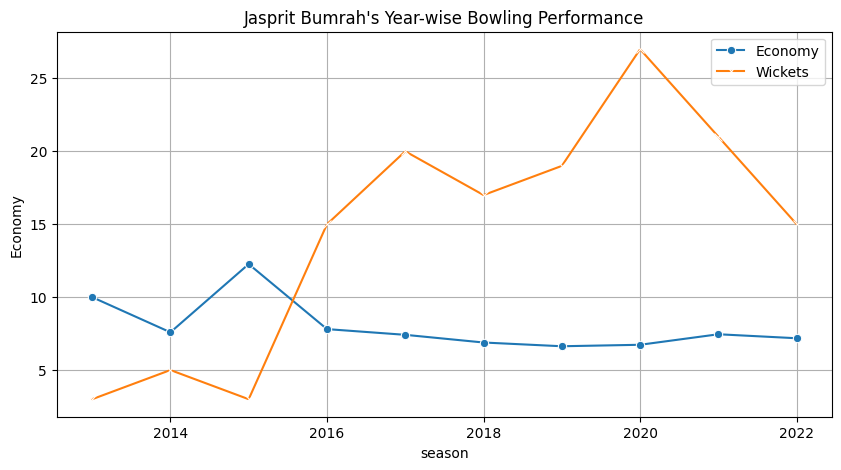

In [33]:
plot_yearly_performance('Jasprit Bumrah')

In [34]:
venue_stats = df.groupby(['fullName', 'venue']).agg(
    Matches=('match_id', 'nunique'),
    Balls=('total_balls', 'sum'),
    Runs=('conceded', 'sum'),
    Wickets=('wickets', 'sum')
).reset_index()
venue_stats['Economy'] = (venue_stats['Runs'] / venue_stats['Balls']) * 6
venue_stats['StrikeRate'] = venue_stats['Balls'] / venue_stats['Wickets']

def show_venue_stats(player, venue_stats_df):
    data = venue_stats_df[venue_stats_df['fullName'] == player]
    data_sorted = data.sort_values(by='Wickets', ascending=False)

    fig = px.bar(
        data_sorted,
        x='venue',
        y='Wickets',
        title=f'Wickets by {player} at Different Venues',
        labels={'Wickets': 'Number of Wickets', 'venue': 'Venue'},
        text='Wickets'
    )
    fig.update_traces(textposition='outside')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

In [35]:
show_venue_stats('Jasprit Bumrah',venue_stats)

In [36]:
venue_stats

,fullName,venue,Matches,Balls,Runs,Wickets,Economy,StrikeRate
0,Aaron Finch,"Arun Jaitley Stadium, Delhi",1,12,13,0,6.500000,inf
1,Aaron Finch,"Eden Gardens, Kolkata",1,7,5,0,4.285714,inf
2,Aaron Finch,"M.Chinnaswamy Stadium, Bengaluru",1,6,29,0,29.000000,inf
3,Aaron Finch,"MA Chidambaram Stadium, Chepauk, Chennai",1,6,9,0,9.000000,inf
4,Aaron Finch,"Wankhede Stadium, Mumbai",1,12,11,1,5.500000,12.0
...,...,...,...,...,...,...,...,...
4233,Zaheer Khan,Sharjah Cricket Stadium,1,17,17,0,6.000000,inf
4234,Zaheer Khan,"Sheikh Zayed Stadium, Abu Dhabi",1,24,23,1,5.750000,24.0
4235,Zaheer Khan,"St George's Park, Port Elizabeth",1,18,14,1,4.666667,18.0
4236,Zaheer Khan,"The Wanderers Stadium, Johannesburg",1,12,12,1,6.000000,12.0


In [37]:
opponent_stats = df.groupby(['fullName', 'batting_team']).agg(
    Matches=('match_id', 'nunique'),
    Balls=('total_balls', 'sum'),
    Runs=('conceded', 'sum'),
    Wickets=('wickets', 'sum')
).reset_index()
opponent_stats['Economy'] = (opponent_stats['Runs'] / opponent_stats['Balls']) * 6
opponent_stats['StrikeRate'] = opponent_stats['Balls'] / opponent_stats['Wickets']

import plotly.express as px


def show_opponent_stats(player):
    data = opponent_stats[opponent_stats['fullName'] == player]


    data_sorted = data.sort_values(by='Wickets', ascending=False)

    fig = px.bar(
        data_sorted,
        x='batting_team',
        y='Wickets',
        title=f'Wickets by {player} against Different Teams',
        labels={'Wickets': 'Number of Wickets', 'batting_team': 'Opponent Team'},
        text='Wickets'
    )
    fig.update_traces(textposition='outside')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

In [38]:
show_opponent_stats('Jasprit Bumrah')

In [39]:
import plotly.express as px

def plot_economical_bowlers(career_summary):
    economical_bowlers = career_summary[career_summary['Total_Balls'] > 300]
    economical_bowlers = economical_bowlers.sort_values(by='Economy')

    fig = px.bar(
        economical_bowlers,
        x='fullName',
        y='Economy',
        title='Top Economical Bowlers (Min 300 Balls)',
        labels={'fullName': 'Bowler', 'Economy': 'Economy Rate'},
        text='Economy'
    )
    fig.update_traces(textposition='outside')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()


In [40]:
plot_economical_bowlers(career_summary_sorted)

In [41]:
fielding_data

,season,match_id,match_name,home_team,away_team,venue,batting_team,bowling_innings,bowling_team,fullName,catching_FP,stumping_FP,direct_runout_FP,indirect_runout_FP,Fielding_FP
0,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,1,CSK,MS Dhoni,8,12,0,0,20
1,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,1,CSK,Ruturaj Gaikwad,8,0,0,0,8
2,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",CSK,2,GT,David Miller,8,0,0,0,8
3,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",CSK,2,GT,Mohit Sharma,8,0,0,0,8
4,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",CSK,2,GT,Rashid Khan,8,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,2008,335988,SRH v DC,SRH,DC,"Rajiv Gandhi International Stadium, Uppal, Hyd...",SRH,1,DC,Manoj Tiwary,0,0,0,6,6
7268,2008,335987,RR v PBKS,RR,PBKS,"Sawai Mansingh Stadium, Jaipur",PBKS,1,RR,Ravindra Jadeja,0,0,0,6,6
7269,2008,335984,DC v RR,DC,RR,"Arun Jaitley Stadium, Delhi",RR,1,DC,Rajat Bhatia,0,0,0,6,6
7270,2008,335984,DC v RR,DC,RR,"Arun Jaitley Stadium, Delhi",RR,1,DC,Shikhar Dhawan,0,0,0,6,6


In [51]:
career_fielding = fielding_data.groupby('fullName').agg(
    Matches=('match_id', 'nunique'),
    Total_Catches=('catching_FP', 'sum'),
    Total_Direct_Runouts=('direct_runout_FP', 'sum'),
    Total_indirect_Runouts=('indirect_runout_FP', 'sum'),
    Total_Stumpings=('stumping_FP', 'sum'),
    Total_Fielding_FP=('Fielding_FP', 'sum')  # if fantasy points are present
).reset_index()

career_fielding['Total_Dismissals'] = (
    career_fielding['Total_Catches'] +
    career_fielding['Total_Direct_Runouts'] +
    career_fielding['Total_Stumpings']+
    career_fielding['Total_indirect_Runouts']
)
career_fielding['Total_Runouts'] = career_fielding['Total_Direct_Runouts'] + career_fielding['Total_indirect_Runouts']

In [43]:
career_fielding

,fullName,Matches,Total_Catches,Total_Direct_Runouts,Total_indirect_Runouts,Total_Stumpings,Total_Fielding_FP,Total_Dismissals
0,AB de Villiers,104,944,72,114,96,1246,1226
1,Aakash Chopra,3,16,0,6,0,22,22
2,Aaron Finch,29,232,36,6,0,274,274
3,Aavishkar Salvi,2,16,0,0,0,16,16
4,Abdul Samad,14,144,0,0,0,144,144
...,...,...,...,...,...,...,...,...
570,Yuzvendra Chahal,24,176,12,30,0,218,218
571,Zaheer Khan,24,160,24,30,0,214,214
572,de Silva,2,0,24,0,0,24,24
573,substitute_catch,148,1280,72,90,0,1454,1442


In [44]:
career_fielding=career_fielding[career_fielding['fullName']!='substitute_catch']

In [45]:
career_fielding

,fullName,Matches,Total_Catches,Total_Direct_Runouts,Total_indirect_Runouts,Total_Stumpings,Total_Fielding_FP,Total_Dismissals
0,AB de Villiers,104,944,72,114,96,1246,1226
1,Aakash Chopra,3,16,0,6,0,22,22
2,Aaron Finch,29,232,36,6,0,274,274
3,Aavishkar Salvi,2,16,0,0,0,16,16
4,Abdul Samad,14,144,0,0,0,144,144
...,...,...,...,...,...,...,...,...
569,Yuvraj Singh,30,256,48,36,0,340,340
570,Yuzvendra Chahal,24,176,12,30,0,218,218
571,Zaheer Khan,24,160,24,30,0,214,214
572,de Silva,2,0,24,0,0,24,24


In [52]:
# prompt: Using dataframe career_fielding: plot top 5
#  stumpings  using plotly bar graph

import plotly.express as px

# Sort the dataframe by Total_Stumpings in descending order and get the top 5
top_stumpings = career_fielding.sort_values(by='Total_Stumpings', ascending=False).head(5)

# Create a bar chart using Plotly
fig = px.bar(top_stumpings, x='fullName', y='Total_Stumpings', title='Top 5 Players by Total Stumpings')

# Display the chart
fig.show()

In [53]:
# prompt: Using dataframe career_fielding: plot top 10
#  total runouts  using plotly bar graph

import plotly.express as px

# Sort the dataframe by Total_Runouts in descending order and select the top 10
top_10_runouts = career_fielding.sort_values(by='Total_Runouts', ascending=False).head(10)

# Create a bar chart using Plotly
fig = px.bar(top_10_runouts, x='fullName', y='Total_Runouts', title='Top 10 Players by Total Runouts')

# Display the chart
fig.show()

In [54]:
# prompt: Using dataframe career_fielding: plot a graph using ploty bar graph to top 10 total catches

import plotly.express as px

# Sort the dataframe by Total_Catches in descending order and select the top 10
top_10_catches = career_fielding.sort_values(by='Total_Catches', ascending=False).head(10)

# Create a bar chart using Plotly
fig = px.bar(top_10_catches, x='fullName', y='Total_Catches', title='Top 10 Players by Total Catches')

# Display the chart
fig.show()

In [55]:





batting_data = pd.read_csv('/content/sample_data/Batting_data.csv')
individual_scores = (
    batting_data.groupby(["match_id", "fullName"])["runs"]
    .sum().reset_index()
)

# 🔗 Add match details: match_name, home_team, away_team, venue, season
match_info = batting_data[[
    "match_id", "match_name", "home_team", "away_team", "venue", "season"
]].drop_duplicates()

# 🔄 Merge match info
individual_scores = individual_scores.merge(match_info, on="match_id", how="left")

# 🏏 Top 10 highest individual scores
top_scores = individual_scores.sort_values(by="runs", ascending=False).head(10)

# 🪪 Create a detailed label for x-axis
top_scores["details"] = (
    top_scores["fullName"] + "<br>" +
    top_scores["match_name"] + " (" + top_scores["season"].astype(str) + ")" + "<br>" +
    top_scores["venue"]
)

# 📊 Plot
fig = px.bar(
    top_scores,
    x="details",
    y="runs",
    title="Top 10 Highest Individual Scores in a Match (with Match Info)",
    labels={"details": "Batsman & Match Info", "runs": "Runs"},
    text="runs",
    color="fullName"
)

fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_tickangle=-30,
    height=600,
    showlegend=False
)
fig.show()


In [56]:
# 🏏 Step 1: Group by match + batsman to get individual match scores
batting_agg = batting_data.groupby(['match_id', 'fullName'])['runs'].sum().reset_index()

# ✅ Step 2: Add a column for 50s (between 50 and 99)
batting_agg['is_fifty'] = batting_agg['runs'].between(50, 99)

# 📊 Step 3: Count number of 50s per batsman
fifty_counts = batting_agg.groupby('fullName')['is_fifty'].sum().reset_index(name='fifty_count')

# 🔝 Step 4: Top 10 batsmen by number of 50s
top_10_fifties = fifty_counts.sort_values(by='fifty_count', ascending=False).head(10)

# 📈 Step 5: Plot using Plotly
import plotly.express as px

fig = px.bar(
    top_10_fifties,
    x='fullName',
    y='fifty_count',
    title='Top 10 Batsmen with Most Fifties (50-99 Runs)',
    labels={'fullName': 'Batsman', 'fifty_count': 'Number of Fifties'},
    text='fifty_count',
    color='fullName'
)

fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,
    height=500
)

fig.show()


In [57]:
# 🏏 Step 1: Use the same match-wise batting aggregation
batting_agg = batting_data.groupby(['match_id', 'fullName'])['runs'].sum().reset_index()

# ✅ Step 2: Add a column for 100s (runs >= 100)
batting_agg['is_hundred'] = batting_agg['runs'] >= 100

# 📊 Step 3: Count number of 100s per batsman
hundred_counts = batting_agg.groupby('fullName')['is_hundred'].sum().reset_index(name='hundred_count')

# 🔝 Step 4: Top 10 batsmen by number of 100s
top_10_hundreds = hundred_counts.sort_values(by='hundred_count', ascending=False).head(10)

# 📈 Step 5: Plot using Plotly
import plotly.express as px

fig = px.bar(
    top_10_hundreds,
    x='fullName',
    y='hundred_count',
    title='Top 10 Batsmen with Most Hundreds (100+ Runs)',
    labels={'fullName': 'Batsman', 'hundred_count': 'Number of Hundreds'},
    text='hundred_count',
    color='fullName'
)

fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,
    height=500
)

fig.show()


In [58]:
# 🏏 Step 1: Group by match, venue, and batsman to get individual scores
venue_scores = batting_data.groupby(['match_id', 'venue', 'fullName'])['runs'].sum().reset_index()

# 🔄 Step 2: Add match info
match_info = batting_data[['match_id', 'match_name', 'season']].drop_duplicates()
venue_scores = venue_scores.merge(match_info, on='match_id', how='left')

# 🔝 Step 3: Get top 1 score per venue
top1_venue_scores = venue_scores.sort_values(by='runs', ascending=False).groupby('venue').head(1)

# 🪪 Step 4: Create label for hover
top1_venue_scores['Hover'] = (
    "Batsman: " + top1_venue_scores['fullName'] + "<br>" +
    "Match: " + top1_venue_scores['match_name'] + "<br>" +
    "Season: " + top1_venue_scores['season'].astype(str) + "<br>" +
    "Runs: " + top1_venue_scores['runs'].astype(str)
)

# 📊 Step 5: Plot bar graph
import plotly.express as px

fig = px.bar(
    top1_venue_scores,
    x='venue',
    y='runs',
    color='fullName',
    text='runs',
    hover_name='Hover',
    title='Highest Individual Score at Each Venue',
    labels={'venue': 'Venue', 'runs': 'Runs'}
)

fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_tickangle=45,
    height=600,
    showlegend=True
)

fig.show()


In [59]:
import pandas as pd
import plotly.express as px




# Get unique values
venue_options = sorted(batting_data['venue'].dropna().unique())
season_options = sorted(batting_data['season'].dropna().unique())
team_options = sorted(batting_data['bowling_team'].dropna().unique())

# Add 'All' options
season_options = ['All'] + season_options
team_options = ['All'] + team_options

# Show available options
print("\nAvailable Venues:\n", venue_options)
print("\nAvailable Seasons:\n", season_options)
print("\nAvailable Opponent Teams:\n", team_options)

# 📥 User Inputs (replace input() with dropdown UI in notebooks)
venue_input = input("\nEnter venue from above list: ").strip()
season_input = input("Enter season (or type 'All'): ").strip()
team_input = input("Enter opponent team (or type 'All'): ").strip()

# 🎯 Filter data
filtered = batting_data[batting_data['venue'].str.lower() == venue_input.lower()]

if season_input != 'All':
    filtered = filtered[filtered['season'].astype(str).str.lower() == season_input.lower()]

if team_input != 'All':
    filtered = filtered[filtered['bowling_team'].str.lower() == team_input.lower()]

# ✅ Plot only if data exists
if filtered.empty:
    print("No data found for selected filters.")
else:
    top_batsmen = (
        filtered.groupby('fullName')['runs']
        .sum()
        .reset_index()
        .sort_values(by='runs', ascending=False)
        .head(5)
    )

    fig = px.bar(
        top_batsmen,
        x='fullName',
        y='runs',
        text='runs',
        title=f"Top 5 Run Scorers at {venue_input}",
        labels={'fullName': 'Batsman', 'runs': 'Total Runs'},
        color='fullName'
    )

    fig.update_traces(textposition='outside')
    fig.update_layout(showlegend=False, xaxis_tickangle=-45, height=500)
    fig.show()



Available Venues:
 ['Arun Jaitley Stadium, Delhi', 'Barabati Stadium, Cuttack', 'Barsapara Cricket Stadium, Guwahati', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow', 'Brabourne Stadium, Mumbai', 'Buffalo Park, East London', 'Diamond Oval, Kimberley', 'Dr DY Patil Sports Academy, Mumbai', 'Dr DY Patil Sports Academy, Navi Mumbai', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam', 'Dubai International Cricket Stadium', 'Eden Gardens, Kolkata', 'Green Park, Kanpur', 'Himachal Pradesh Cricket Association Stadium, Dharamsala', 'Holkar Cricket Stadium, Indore', 'JSCA International Stadium Complex, Ranchi', 'Kingsmead, Durban', 'M.Chinnaswamy Stadium, Bengaluru', 'MA Chidambaram Stadium, Chepauk, Chennai', 'Maharashtra Cricket Association Stadium, Pune', 'Mangaung Oval, Bloemfontein', 'Narendra Modi Stadium, Motera, Ahmedabad', 'Nehru Stadium, Kochi', 'Newlands, Cape Town', 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh', 'Raji

In [60]:
import pandas as pd
import plotly.express as px


unique_teams = batting_data['bowling_team'].dropna().unique()
print("Available Opponent Teams:\n")
for team in unique_teams:
    print("-", team)

# 📥 User input: Enter opponent team
selected_team = input("\nEnter opponent team name exactly as shown above: ").strip()

# 🎯 Filter data for selected team
filtered = batting_data[batting_data['bowling_team'].str.lower() == selected_team.lower()]

# 🔍 Check if data exists
if filtered.empty:
    print(f"No data found for opponent team: {selected_team}")
else:
    # Group by batsman and sum runs
    top_batsmen = (
        filtered.groupby('fullName')['runs']
        .sum()
        .reset_index()
        .sort_values(by='runs', ascending=False)
        .head(10)
    )

    # 📊 Plot the bar graph
    fig = px.bar(
        top_batsmen,
        x='fullName',
        y='runs',
        text='runs',
        title=f"Top 10 Run Scorers Against {selected_team}",
        labels={'fullName': 'Batsman', 'runs': 'Total Runs'},
        color='fullName'
    )

    fig.update_traces(textposition='outside')
    fig.update_layout(showlegend=False, xaxis_tickangle=-45, height=500)
    fig.show()


Available Opponent Teams:

- GT
- CSK
- KKR
- PBKS
- DC
- LSG
- SRH
- RR
- RCB
- MI
- RPS
- GL
- PWI
- Kochi

Enter opponent team name exactly as shown above: CSK


In [61]:
import pandas as pd
import plotly.express as px



# 🎯 Show unique values for filtering help
print("Available Seasons:\n", sorted(batting_data['season'].dropna().unique()))
print("\nAvailable Teams:\n", sorted(batting_data['bowling_team'].dropna().unique()))
print("\nAvailable Venues:\n", sorted(batting_data['venue'].dropna().unique()))
print("\nAvailable Players:\n", sorted(batting_data['fullName'].dropna().unique())[:20], "...")

# 📥 Manual Inputs
season_input = input("\nEnter season (or 'All'): ").strip()
team_input = input("Enter opponent team (or 'All'): ").strip()
venue_input = input("Enter venue (or 'All'): ").strip()
player_input = input("Enter player name (or 'All'): ").strip()

# 🔍 Apply filters
df = batting_data.copy()

if season_input.lower() != 'all':
    df = df[df['season'].astype(str).str.lower() == season_input.lower()]

if team_input.lower() != 'all':
    df = df[df['bowling_team'].str.lower() == team_input.lower()]

if venue_input.lower() != 'all':
    df = df[df['venue'].str.lower() == venue_input.lower()]

if player_input.lower() != 'all':
    df = df[df['fullName'].str.lower() == player_input.lower()]

# ❌ Handle empty case
if df.empty:
    print("\nNo data found for the selected filters.")
else:
    # Group by player, sum sixes/fours
    six_data = (
        df.groupby('fullName')['sixes']
        .sum()
        .reset_index()
        .sort_values(by='sixes', ascending=False)
        .head(10)
    )

    four_data = (
        df.groupby('fullName')['fours']
        .sum()
        .reset_index()
        .sort_values(by='fours', ascending=False)
        .head(10)
    )

    # 🎯 Plot top 10 six-hitters
    fig1 = px.bar(
        six_data,
        x='fullName',
        y='sixes',
        text='sixes',
        title='Top 10 Six-Hitters',
        labels={'fullName': 'Batsman', 'sixes': 'Total Sixes'},
        color='fullName'
    )
    fig1.update_traces(textposition='outside')
    fig1.update_layout(showlegend=False, xaxis_tickangle=-45, height=500)
    fig1.show()

    # 🎯 Plot top 10 four-hitters
    fig2 = px.bar(
        four_data,
        x='fullName',
        y='fours',
        text='fours',
        title='Top 10 Four-Hitters',
        labels={'fullName': 'Batsman', 'fours': 'Total Fours'},
        color='fullName'
    )
    fig2.update_traces(textposition='outside')
    fig2.update_layout(showlegend=False, xaxis_tickangle=-45, height=500)
    fig2.show()


Available Seasons:
 [np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]

Available Teams:
 ['CSK', 'DC', 'GL', 'GT', 'KKR', 'Kochi', 'LSG', 'MI', 'PBKS', 'PWI', 'RCB', 'RPS', 'RR', 'SRH']

Available Venues:
 ['Arun Jaitley Stadium, Delhi', 'Barabati Stadium, Cuttack', 'Barsapara Cricket Stadium, Guwahati', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow', 'Brabourne Stadium, Mumbai', 'Buffalo Park, East London', 'Diamond Oval, Kimberley', 'Dr DY Patil Sports Academy, Mumbai', 'Dr DY Patil Sports Academy, Navi Mumbai', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam', 'Dubai International Cricket Stadium', 'Eden Gardens, Kolkata', 'Green Park, Kanpur', 'Himachal Pradesh Cricket Association Stadium, Dharamsala', 'Holkar Cricket Stadium, Indore'

In [62]:
batting_data

,match_id,season,match_name,home_team,away_team,venue,bowling_team,batting_team,batting_innings,fullName,batting_position,runs,balls,fours,sixes,strike_rate,Batting_FP
0,1359475,2023,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,CSK,1,Devon Conway,1,1,6,0,0,16.66,1
1,1359475,2023,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,CSK,1,Ruturaj Gaikwad,2,92,50,4,9,184.00,128
2,1359475,2023,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,CSK,1,Moeen Ali,3,23,17,4,1,135.29,31
3,1359475,2023,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,CSK,1,Ben Stokes,4,7,6,1,0,116.66,8
4,1359475,2023,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,CSK,1,Ambati Rayudu,5,12,12,0,1,100.00,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15709,336040,2008,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",CSK,RR,2,Yusuf Pathan,5,56,39,3,4,143.58,77
15710,336040,2008,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",CSK,RR,2,Mohammad Kaif,6,12,9,0,1,133.33,14
15711,336040,2008,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",CSK,RR,2,Ravindra Jadeja,7,0,1,0,0,0.00,-2
15712,336040,2008,CSK v RR,CSK,RR,"Dr DY Patil Sports Academy, Mumbai",CSK,RR,2,Shane Warne,8,9,9,1,0,100.00,10


In [ ]:
bowling_data

,season,match_id,match_name,home_team,away_team,batting_team,bowling_team,venue,bowling_innings,fullName,...,wickets,economyRate,wides,noballs,LBW,Hitwicket,CaughtBowled,Bowled,Overs_Bowled,Bowling_FP
0,2023,1359475,GT v CSK,GT,CSK,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",1,Mohammed Shami,...,2,7.25,0,1,0,0,0,1,"[1, 3, 5, 19]",58
1,2023,1359475,GT v CSK,GT,CSK,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",1,Hardik Pandya,...,0,9.33,0,0,0,0,0,0,"[2, 7, 15]",0
2,2023,1359475,GT v CSK,GT,CSK,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",1,Josh Little,...,1,10.25,0,0,0,0,0,1,"[4, 11, 13, 20]",31
3,2023,1359475,GT v CSK,GT,CSK,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",1,Rashid Khan,...,2,6.50,0,0,0,0,0,0,"[6, 8, 10, 17]",52
4,2023,1359475,GT v CSK,GT,CSK,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",1,Alzarri Joseph,...,2,8.25,0,0,0,0,0,0,"[9, 14, 16, 18]",50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12106,2008,336040,CSK v RR,CSK,RR,RR,CSK,"Dr DY Patil Sports Academy, Mumbai",2,Makhaya Ntini,...,0,5.25,0,0,0,0,0,0,"[1, 3, 5, 19]",16
12107,2008,336040,CSK v RR,CSK,RR,RR,CSK,"Dr DY Patil Sports Academy, Mumbai",2,Manpreet Gony,...,1,7.50,0,0,0,0,0,1,"[2, 4, 6, 14]",33
12108,2008,336040,CSK v RR,CSK,RR,RR,CSK,"Dr DY Patil Sports Academy, Mumbai",2,Albie Morkel,...,2,6.25,3,2,0,0,0,0,"[7, 9, 12, 18]",52
12109,2008,336040,CSK v RR,CSK,RR,RR,CSK,"Dr DY Patil Sports Academy, Mumbai",2,Lakshmipathy Balaji,...,0,10.50,1,0,0,0,0,0,"[8, 10, 16, 20]",-2


In [63]:


wickets_df = (
    bowling_data.groupby(['match_id', 'fullName', 'batting_team', 'bowling_team', 'season', 'venue'])['wickets']
    .sum()
    .reset_index()
)

# Top 10 wicket performances
top_10_wickets = wickets_df.sort_values(by='wickets', ascending=False).head(10)

# Create display label
top_10_wickets['Match Info'] = (
    top_10_wickets['fullName'] + " vs " + top_10_wickets['batting_team'] +
    " | " + top_10_wickets['venue'] +
    " | Season: " + top_10_wickets['season'].astype(str)
)

# Plot
fig = px.bar(
    top_10_wickets,
    x='Match Info',
    y='wickets',
    text='wickets',
    title='Top 10 Highest Wicket-Taking Performances in a Single Match',
    labels={'wickets': 'Wickets Taken'},
    color='fullName'
)

fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False, xaxis_tickangle=-45, height=550)
fig.show()


In [65]:
# Step 1: Group by season and bowler to get total wickets
season_wickets = (
    bowling_data.groupby(['season', 'fullName'])['wickets']
    .sum()
    .reset_index()
)

# Step 2: For each season, get the bowler with max wickets
top_season_wickets = (
    season_wickets.sort_values(['season', 'wickets'], ascending=[True, False])
    .groupby('season')
    .head(1)
    .reset_index(drop=True)
)

# Step 3: Create bar chart
fig = px.bar(
    top_season_wickets,
    x='season',
    y='wickets',
    text='fullName',
    color='fullName',
    title='Purple cap holder in Each Season',
    labels={'wickets': 'Total Wickets', 'season': 'Season'}
)

fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False, height=500)
fig.show()

In [67]:
import plotly.express as px

print("\nAvailable Teams:", sorted(bowling_data['bowling_team'].dropna().unique()))
print("Available Venues:", sorted(bowling_data['venue'].dropna().unique()))
print("Available Seasons:", sorted(bowling_data['season'].dropna().unique()))

# Manual input
team_input = input("\nEnter Bowling Team (or 'All'): ").strip().lower()
venue_input = input("Enter Venue (or 'All'): ").strip().lower()
season_input = input("Enter Season (or 'All'): ").strip().lower()

# Filter the dataframe
filtered_df = bowling_data.copy()

if team_input != 'all':
    filtered_df = filtered_df[filtered_df['bowling_team'].str.lower() == team_input]

if venue_input != 'all':
    filtered_df = filtered_df[filtered_df['venue'].str.lower() == venue_input]

if season_input != 'all':
    filtered_df = filtered_df[filtered_df['season'].astype(str).str.lower() == season_input]

# Check if any data left
if filtered_df.empty:
    print("No data found for selected filters.")
else:
    # Group by bowler and sum wickets
    top_bowlers = (
        filtered_df.groupby('fullName')['wickets']
        .sum()
        .reset_index()
        .sort_values(by='wickets', ascending=False)
        .head(5)
    )

    # Plot bar chart
    fig = px.bar(
        top_bowlers,
        x='fullName',
        y='wickets',
        text='wickets',
        title='Top 5 Bowlers by Wickets (Filtered)',
        labels={'fullName': 'Bowler', 'wickets': 'Total Wickets'},
        color='fullName'
    )

    fig.update_traces(textposition='outside')
    fig.update_layout(showlegend=False, height=500)
    fig.show()


Available Teams: ['CSK', 'DC', 'GL', 'GT', 'KKR', 'Kochi', 'LSG', 'MI', 'PBKS', 'PWI', 'RCB', 'RPS', 'RR', 'SRH']
Available Venues: ['Arun Jaitley Stadium, Delhi', 'Barabati Stadium, Cuttack', 'Barsapara Cricket Stadium, Guwahati', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow', 'Brabourne Stadium, Mumbai', 'Buffalo Park, East London', 'Diamond Oval, Kimberley', 'Dr DY Patil Sports Academy, Mumbai', 'Dr DY Patil Sports Academy, Navi Mumbai', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam', 'Dubai International Cricket Stadium', 'Eden Gardens, Kolkata', 'Green Park, Kanpur', 'Himachal Pradesh Cricket Association Stadium, Dharamsala', 'Holkar Cricket Stadium, Indore', 'JSCA International Stadium Complex, Ranchi', 'Kingsmead, Durban', 'M.Chinnaswamy Stadium, Bengaluru', 'MA Chidambaram Stadium, Chepauk, Chennai', 'Maharashtra Cricket Association Stadium, Pune', 'Mangaung Oval, Bloemfontein', 'Narendra Modi Stadium, Motera, Ahmedabad', 'Nehru 

In [70]:
match_details = pd.read_csv('/content/sample_data/matches.csv')

In [71]:
match_details

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [72]:
import pandas as pd
import plotly.express as px

# Load the matches data

df=match_details.copy()
# Keep only matches with full 20-over first innings
df = df[df['target_overs'] == 20]

# Remove missing values in target_runs
df = df.dropna(subset=['target_runs'])

# Estimate actual score of the first innings team (Target - 1)
df['estimated_runs'] = df['target_runs'] - 1

# Create a simplified DataFrame for analysis
batting_df = df[['season', 'venue', 'team1', 'team2', 'estimated_runs']].copy()
batting_df.rename(columns={'team1': 'batting_team', 'team2': 'opponent_team'}, inplace=True)


# --- User Input ---
print("Available Seasons:", sorted(batting_df['season'].dropna().unique()))
print("Available Venues:", sorted(batting_df['venue'].dropna().unique()))
print("Available Batting Teams:", sorted(batting_df['batting_team'].dropna().unique()))

season_input = input("Enter season (or 'All'): ").strip()
venue_input = input("Enter venue (or 'All'): ").strip()
team_input = input("Enter batting team (or 'All'): ").strip()


# --- Filtering based on input ---
filtered = batting_df.copy()

if season_input.lower() != 'all':
    filtered = filtered[filtered['season'].astype(str).str.lower() == season_input.lower()]

if venue_input.lower() != 'all':
    filtered = filtered[filtered['venue'].str.lower() == venue_input.lower()]

if team_input.lower() != 'all':
    filtered = filtered[filtered['batting_team'].str.lower() == team_input.lower()]


# Check if data is empty after filtering
if filtered.empty:
    print("\nNo data found for the selected filters.")
else:
    # Top 5 highest scores from the filtered data
    top_scores = filtered.sort_values(by='estimated_runs', ascending=False).head(5)

    # --- Plotting ---
    fig = px.bar(
        top_scores,
        x='batting_team',
        y='estimated_runs',
        color='batting_team',
        text='estimated_runs', # Corrected column name
        hover_data=['season', 'venue', 'opponent_team'],
        title='Top 5 Highest Team Scores '
    )

    fig.update_layout(
        xaxis_title='Team',
        yaxis_title='Estimated Runs',
        template='plotly_white',
        showlegend=False # Hide legend for clarity
    )

    fig.show()

Available Seasons: ['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022', '2023', '2024']
Available Venues: ['Arun Jaitley Stadium', 'Arun Jaitley Stadium, Delhi', 'Barabati Stadium', 'Barsapara Cricket Stadium, Guwahati', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow', 'Brabourne Stadium', 'Brabourne Stadium, Mumbai', 'Buffalo Park', 'De Beers Diamond Oval', 'Dr DY Patil Sports Academy', 'Dr DY Patil Sports Academy, Mumbai', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam', 'Dubai International Cricket Stadium', 'Eden Gardens', 'Eden Gardens, Kolkata', 'Feroz Shah Kotla', 'Green Park', 'Himachal Pradesh Cricket Association Stadium', 'Himachal Pradesh Cricket Association Stadium, Dharamsala', 'Holkar Cricket Stadium', 'JSCA International Stadium Complex', 'Kingsmead', 'M Chinnaswamy Stadium', 'M Chinnaswamy Stadiu

In [73]:
import pandas as pd
import plotly.express as px

# Load dataset
df = match_details.copy()

# Keep only matches with full 20-over first innings
df = df[df['target_overs'] == 20]

# Remove missing values
df = df.dropna(subset=['target_runs', 'result_margin'])

# Estimate actual runs of chasing team
def estimate_runs(row):
    if row['result'] == 'runs' and row['result_margin'] > 0:
        return row['target_runs'] - 1 - row['result_margin']
    else:
        return row['target_runs'] - 1

df['estimated_runs'] = df.apply(estimate_runs, axis=1)

# Create simplified DataFrame
batting_df = df[['season', 'venue', 'team2', 'team1', 'estimated_runs']].copy()
batting_df.rename(columns={'team2': 'batting_team', 'team1': 'opponent_team'}, inplace=True)

# --- Manual Input ---
season_input = input("Enter season (or 'All'): ")
venue_input = input("Enter venue (or 'All'): ")
team_input = input("Enter batting team (or 'All'): ")

# Apply filters
filtered = batting_df.copy()
if season_input != 'All':
    filtered = filtered[filtered['season'] == season_input]
if venue_input != 'All':
    filtered = filtered[filtered['venue'] == venue_input]
if team_input != 'All':
    filtered = filtered[filtered['batting_team'] == team_input]

# Top 5 Lowest Scores
lowest_scores = filtered.sort_values(by='estimated_runs').head(5)

# Plot
fig = px.bar(
    lowest_scores,
    x='batting_team',
    y='estimated_runs',
    color='batting_team',
    text='estimated_runs',
    hover_data=['season', 'venue', 'opponent_team'],
    title='Top 5 Lowest Team Scores'
)

fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Estimated Runs',
    template='plotly_white'
)

fig.show()


Enter season (or 'All'): All
Enter venue (or 'All'): All
Enter batting team (or 'All'): All


In [74]:
df = match_details.copy()

# Filter full matches (20 overs first innings) and successful chases
df = df[(df['target_overs'] == 20) & (df['result'] == 'wickets')]

# Drop NA values
df = df.dropna(subset=['target_runs'])

# Estimate score of chasing team
df['chased_runs'] = df['target_runs'] - 1

# Create chase dataframe
chase_df = df[['season', 'venue', 'team2', 'team1', 'chased_runs']].copy()
chase_df.rename(columns={'team2': 'batting_team', 'team1': 'opponent_team'}, inplace=True)

# --- User Inputs ---
season_input = input("Enter season (or 'All'): ")
venue_input = input("Enter venue (or 'All'): ")
team_input = input("Enter batting team (or 'All'): ")

# Filter by user input
if season_input != 'All':
    chase_df = chase_df[chase_df['season'] == season_input]
if venue_input != 'All':
    chase_df = chase_df[chase_df['venue'] == venue_input]
if team_input != 'All':
    chase_df = chase_df[chase_df['batting_team'] == team_input]

# Sort and get top 5 highest run chases
top_chases = chase_df.sort_values(by='chased_runs', ascending=False).head(5)

# Plot
fig = px.bar(
    top_chases,
    x='batting_team',
    y='chased_runs',
    color='batting_team',
    text='chased_runs',
    hover_data=['season', 'venue', 'opponent_team'],
    title='Top 5 Highest Run Chases by Teams'
)

fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Runs Chased',
    template='plotly_white'
)

fig.show()


Enter season (or 'All'): All
Enter venue (or 'All'): All
Enter batting team (or 'All'): All


In [75]:
import pandas as pd
import plotly.express as px

# Load the matches dataset
df = match_details.copy()



# Filter matches where result was "runs" and target_overs == 20 (full innings)
df = df[(df['result'] == 'runs') & (df['target_overs'] == 20)]
df = df.dropna(subset=['target_runs', 'result_margin'])

# Estimate the actual score (first innings)
df['defended_runs'] = df['target_runs'] - 1

# Prepare dataframe for plotting
defense_df = df[['season', 'venue', 'team1', 'team2', 'defended_runs', 'result_margin']].copy()
defense_df.rename(columns={'team1': 'defending_team', 'team2': 'chasing_team'}, inplace=True)

# Optional: Manual filter
season_input = input("Enter season (or 'All'): ")
venue_input = input("Enter venue (or 'All'): ")
team_input = input("Enter defending team (or 'All'): ")

if season_input != 'All':
    defense_df = defense_df[defense_df['season'] == season_input]
if venue_input != 'All':
    defense_df = defense_df[defense_df['venue'] == venue_input]
if team_input != 'All':
    defense_df = defense_df[defense_df['defending_team'] == team_input]

# Get top 5 lowest successful defenses
lowest_defenses = defense_df.sort_values(by='defended_runs').head(5)

# Plot
fig = px.bar(
    lowest_defenses,
    x='defending_team',
    y='defended_runs',
    color='defending_team',
    text='defended_runs',
    hover_data=['season', 'venue', 'chasing_team', 'result_margin'],
    title='Top 5 Lowest Scores Successfully Defended by Teams'
)

fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Runs Defended',
    template='plotly_white'
)

fig.show()


Enter season (or 'All'): All
Enter venue (or 'All'): All
Enter defending team (or 'All'): All


In [76]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = match_details.copy()

# IPL team abbreviation mapping
team_abbr_map = {
    "Mumbai Indians": "MI",
    "Chennai Super Kings": "CSK",
    "Royal Challengers Bangalore": "RCB",
    "Kolkata Knight Riders": "KKR",
    "Sunrisers Hyderabad": "SRH",
    "Delhi Capitals": "DC",
    "Punjab Kings": "PBKS",
    "Kings XI Punjab": "KXIP",
    "Rajasthan Royals": "RR",
    "Gujarat Titans": "GT",
    "Lucknow Super Giants": "LSG",
    "Deccan Chargers": "DCG",
    "Pune Warriors": "PW",
    "Kochi Tuskers Kerala": "KTK",
    "Rising Pune Supergiant": "RPS",
    "Rising Pune Supergiants": "RPS"
}

# Apply team abbreviation to relevant columns
for col in ['team1', 'team2', 'winner']:
    df[col] = df[col].map(team_abbr_map).fillna(df[col])

# --- Manual inputs ---
team_a = input("Enter Team A (abbreviation, e.g., MI): ").strip().upper()
team_b = input("Enter Team B (abbreviation, e.g., CSK): ").strip().upper()
season_input = input("Enter Season (or 'All'): ").strip()
venue_input = input("Enter Venue (or 'All'): ").strip()

# --- Filter matches where team A and team B played against each other ---
head_to_head_df = df[((df['team1'] == team_a) & (df['team2'] == team_b)) |
                     ((df['team1'] == team_b) & (df['team2'] == team_a))]

# Apply season and venue filters
if season_input != 'All':
    head_to_head_df = head_to_head_df[head_to_head_df['season'] == season_input]
if venue_input != 'All':
    head_to_head_df = head_to_head_df[head_to_head_df['venue'] == venue_input]

# Count wins per team
win_counts = head_to_head_df['winner'].value_counts().reset_index()
win_counts.columns = ['Team', 'Wins']

# Calculate total matches played
total_matches = len(head_to_head_df)
print(f"\n🔢 Total Matches Played between {team_a} and {team_b}: {total_matches}\n")

# Plot using Plotly
fig = px.bar(
    win_counts,
    x='Team',
    y='Wins',
    color='Team',
    text='Wins',
    title=f'Head-to-Head Wins: {team_a} vs {team_b} ({total_matches} Matches)'
)

fig.update_layout(template='plotly_white', xaxis_title='Team', yaxis_title='Number of Wins')
fig.show()


Enter Team A (abbreviation, e.g., MI): CSK
Enter Team B (abbreviation, e.g., CSK): RCB
Enter Season (or 'All'): All
Enter Venue (or 'All'): All

🔢 Total Matches Played between CSK and RCB: 30



Enter Team 1 abbreviation (e.g. MI): RCB
Enter Team 2 abbreviation (e.g. CSK): MI
Enter Venue (e.g. Wankhede Stadium): Wankhede Stadium


/tmp/ipython-input-82-4010084942.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-82-4010084942.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



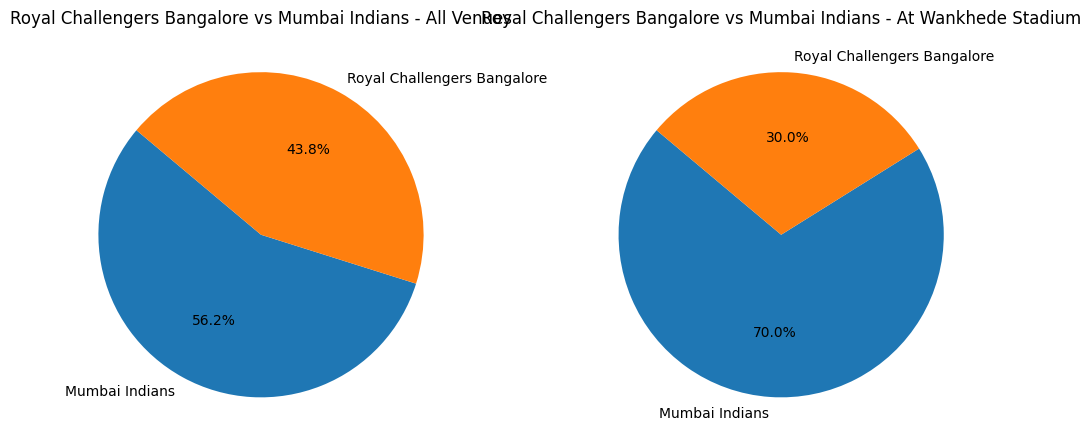


📋 Last 5 Matches Overall (Latest to Oldest):

season       date                       team1                       team2                                         venue                      winner  result  result_margin
  2023 2023-05-09 Royal Challengers Bangalore              Mumbai Indians                      Wankhede Stadium, Mumbai              Mumbai Indians wickets            6.0
  2023 2023-04-02              Mumbai Indians Royal Challengers Bangalore              M Chinnaswamy Stadium, Bengaluru Royal Challengers Bangalore wickets            8.0
  2022 2022-04-09              Mumbai Indians Royal Challengers Bangalore Maharashtra Cricket Association Stadium, Pune Royal Challengers Bangalore wickets            7.0
  2021 2021-09-26 Royal Challengers Bangalore              Mumbai Indians           Dubai International Cricket Stadium Royal Challengers Bangalore    runs           54.0
  2021 2021-04-09              Mumbai Indians Royal Challengers Bangalore      MA Chidambaram Stad

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = match_details.copy()

# IPL team abbreviation map
team_name_map = {
    "CSK": "Chennai Super Kings",
    "MI": "Mumbai Indians",
    "RCB": "Royal Challengers Bangalore",
    "KKR": "Kolkata Knight Riders",
    "RR": "Rajasthan Royals",
    "SRH": "Sunrisers Hyderabad",
    "DC": "Delhi Capitals",
    "KXIP": "Kings XI Punjab",
    "PBKS": "Punjab Kings",
    "GT": "Gujarat Titans",
    "LSG": "Lucknow Super Giants",
    "RPS": "Rising Pune Supergiants",
    "KTK": "Kochi Tuskers Kerala",
    "GL": "Gujarat Lions",
    "PW": "Pune Warriors",
    "DD": "Delhi Daredevils"
}

# --- 📥 Manual Inputs ---
input_team1 = input("Enter Team 1 abbreviation (e.g. MI): ").upper()
input_team2 = input("Enter Team 2 abbreviation (e.g. CSK): ").upper()
input_venue = input("Enter Venue (e.g. Wankhede Stadium): ")

team1 = team_name_map.get(input_team1, input_team1)
team2 = team_name_map.get(input_team2, input_team2)

# --- 🧹 Data Filtering ---
df = df.dropna(subset=['winner'])
df['date'] = pd.to_datetime(df['date'])
df['season'] = df['season'].astype(str)

# Head-to-head filter
h2h = df[((df['team1'] == team1) & (df['team2'] == team2)) |
         ((df['team1'] == team2) & (df['team2'] == team1))]

# 1️⃣ Pie chart: All venues
win_counts_all = h2h['winner'].value_counts()

# 2️⃣ Pie chart: Specific venue
h2h_venue = h2h[h2h['venue'].str.contains(input_venue, case=False, na=False)]
win_counts_venue = h2h_venue['winner'].value_counts()

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(win_counts_all, labels=win_counts_all.index, autopct='%1.1f%%', startangle=140)
plt.title(f"{team1} vs {team2} - All Venues")

plt.subplot(1, 2, 2)
plt.pie(win_counts_venue, labels=win_counts_venue.index, autopct='%1.1f%%', startangle=140)
plt.title(f"{team1} vs {team2} - At {input_venue}")

plt.tight_layout()
plt.show()

# 3️⃣ Last 5 matches overall (latest to oldest)
h2h_sorted = h2h.sort_values(by='date', ascending=False)
last_5_matches = h2h_sorted.head(5)

print("\n📋 Last 5 Matches Overall (Latest to Oldest):\n")
print(last_5_matches[['season', 'date', 'team1', 'team2', 'venue', 'winner', 'result', 'result_margin']].to_string(index=False))


In [77]:
match_details

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [94]:
fantasy_data

,season,match_id,match_name,home_team,away_team,venue,batting_innings,bowling_innings,fullName,Starting_11,Batting_FP,Bowling_FP,Fielding_FP,Total_FP,Dream Team,Captain,Vice Captain
0,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",1,2,Sai Sudharsan,4,130,0,0,134,1,1,0
1,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",1,2,Mohit Sharma,4,0,83,8,95,1,0,1
2,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",1,2,Wriddhiman Saha,4,71,0,0,75,1,0,0
3,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",1,2,Shubman Gill,4,56,0,0,60,1,0,0
4,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",1,2,Noor Ahmad,4,0,54,0,58,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22357,2008,335982,RCB v KKR,RCB,KKR,"M.Chinnaswamy Stadium, Bengaluru",2,1,Sunil Joshi,4,3,0,0,7,0,0,0
22358,2008,335982,RCB v KKR,RCB,KKR,"M.Chinnaswamy Stadium, Bengaluru",2,1,Rahul Dravid,4,2,0,0,6,0,0,0
22359,2008,335982,RCB v KKR,RCB,KKR,"M.Chinnaswamy Stadium, Bengaluru",2,1,Virat Kohli,4,1,0,0,5,0,0,0
22360,2008,335982,RCB v KKR,RCB,KKR,"M.Chinnaswamy Stadium, Bengaluru",2,1,Wasim Jaffer,4,0,0,0,4,0,0,0


In [95]:
fantasy_data=fantasy_data[fantasy_data['season']==2023]

In [96]:
fantasy_data=fantasy_data.drop(columns=['season','match_id','Starting_11','Batting_FP','Bowling_FP','Fielding_FP','Dream Team','Captain','Vice Captain'])

In [97]:
fantasy_data.sample(10)

,match_name,home_team,away_team,venue,batting_innings,bowling_innings,fullName,Total_FP
810,DC v SRH,DC,SRH,"Arun Jaitley Stadium, Delhi",2,1,Kuldeep Yadav,4
648,SRH v KKR,SRH,KKR,"Rajiv Gandhi International Stadium, Uppal, Hyd...",2,1,Mayank Agarwal,46
138,MI v SRH,MI,SRH,"Wankhede Stadium, Mumbai",2,1,Piyush Chawla,4
1467,MI v CSK,MI,CSK,"Wankhede Stadium, Mumbai",1,2,Jason Behrendorff,37
566,DC v RCB,DC,RCB,"Arun Jaitley Stadium, Delhi",1,2,Mahipal Lomror,92
611,RR v GT,RR,GT,"Sawai Mansingh Stadium, Jaipur",1,2,Yuzvendra Chahal,33
1629,CSK v LSG,CSK,LSG,"MA Chidambaram Stadium, Chepauk, Chennai",2,1,Yash Thakur,12
1091,DC v KKR,DC,KKR,"Arun Jaitley Stadium, Delhi",1,2,Venkatesh Iyer,2
1182,RCB v CSK,RCB,CSK,"M.Chinnaswamy Stadium, Bengaluru",1,2,Maheesh Theekshana,35
1690,LSG v DC,LSG,DC,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,1,2,Jaydev Unadkat,-2
